a notebook to run method 1 for adding proteins back

In [9]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from classes.matrix_class import ProteinMatrix
from classes.cluster_class import AllClusters
from classes.degreelist_class import DegreeList

from func_e.FUNC_E import FUNC_E 
import func_e.vocabs.all as vocabs


from recipe_utils import initialize_matrix_clusters_degreelist
from recipe_utils import find_clusters_and_proteins_together
from recipe_utils import print_querylist_of_clusters_to_file
from recipe_utils import get_initialized_fe
from recipe_utils import print_protein_background_to_file


In [10]:
import matplotlib.pyplot as plt
import json


In [11]:
def create_term_mapping_list(go_terms_filepath: str, term_mapping_filepath: str = 'term_mapping.txt'):
    """
    the original file (go_terms_filepath) is in form GOTERM tab PROTEIN, while the term mapping file (term_mapping_filepath) is printed in form PROTEIN tab GOTERM. if a protein has multiple they appear on seperate lines
    """
    with open(term_mapping_filepath, 'w') as file:
        with open(go_terms_filepath, 'r') as go_annotation_file:
            for _ in range(1): # first line of file has column titles, and should be skipped
                next(go_annotation_file)
            for line in go_annotation_file:
                terms = line.split()
                file.write(f"{terms[1]}\t{terms[0]}\n")

In [12]:
dream3_cluster_dict_file = "../../data/results/DREAM-3-cc/d3_5_100.json-cluster.json"
dict_of_clusters = {}
# # convert actual cluster file to a dictionary!!
with open(dream3_cluster_dict_file,"r") as cluster_dict_file:
    dict_of_clusters = json.load(cluster_dict_file)


In [13]:
matrix, clusters, degreelist = initialize_matrix_clusters_degreelist("../../data/networks/DREAM_files/dream_3.txt", "../../data/results/DREAM-3-cc/d3_5_100.json-cluster.json")

In [14]:
genomic_background_filepath = '../../data/testing_data/protein_list.txt'
all_go_terms = vocabs.getTerms(['GO'])
term_mapping_filepath = 'term_mapping.txt'
create_term_mapping_list('../../data/go-results/dream_3_go_results.tsv', term_mapping_filepath)

# METHOD:

In [15]:
# # run program using min_components method
# qualifying_clusters, qualifying_proteins = find_clusters_and_proteins_together(matrix, clusters, degreelist, cluster_ratio=0, cluster_constant=0,min_components_that_protein_connects=3)

In [16]:
# run program using sqrt method
qualifying_clusters, qualifying_proteins = find_clusters_and_proteins_together(matrix, clusters, degreelist, cluster_ratio=0, cluster_constant=0,min_components_that_protein_connects=3)

In [17]:
print(qualifying_proteins.keys())

dict_keys([0, 4, 6, 7, 11, 12, 13, 14, 21, 25, 26, 29, 30, 32, 34, 39, 41, 47, 49, 50, 51, 61, 62, 63, 65, 69, 72, 73, 75, 77, 79, 81, 82, 84, 85, 87, 89, 90, 95, 96, 98, 99, 103, 104, 107, 108, 110, 111, 114, 115, 117, 119, 121, 122, 123, 125, 126, 127, 132, 134, 137, 138, 141, 142, 144, 146, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 164, 167, 168, 170, 171, 172, 175, 178, 179, 180, 185, 189, 193, 194, 195])


In [18]:
original_clusters_querylist = 'm1_og_querylist.txt'
updated_clusters_querylist_all_proteins = 'm1_new_querylist_all_proteins.txt'

# original:
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(),original_clusters_querylist)

# clusters with all proteins added:
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(), updated_clusters_querylist_all_proteins, qualifying_proteins)

get_all_cluster_labels fxn has not been tested
get_all_cluster_labels fxn has not been tested


In [19]:
original_fe = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

original_fe.importFiles({'query': original_clusters_querylist })
original_fe.run(cluster=False)


In [20]:
updated_fe_all_proteins = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_all_proteins.importFiles({'query': updated_clusters_querylist_all_proteins })
updated_fe_all_proteins.run(cluster=False)

In [21]:
# add only 1 protein
one_qualifying_protein = dict()
for key in qualifying_proteins:
    one_qualifying_protein[key] = [qualifying_proteins[key][0]]


updated_clusters_querylist_one_protein = 'm1_new_querylist_one_protein.txt'
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(), updated_clusters_querylist_one_protein, one_qualifying_protein)

# run functional enrichment for 1 protein added
updated_fe_one_protein = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)
updated_fe_one_protein.importFiles({'query': updated_clusters_querylist_one_protein })
updated_fe_one_protein.run(cluster=False)

get_all_cluster_labels fxn has not been tested


In [22]:
# add only (up to) 2 proteins
two_qualifying_proteins = dict()
for key in qualifying_proteins:
    two_qualifying_proteins[key] = qualifying_proteins[key][0:2]

updated_clusters_querylist_two_proteins = 'm1_new_querylist_two_proteins.txt'
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(), updated_clusters_querylist_two_proteins, two_qualifying_proteins)

# run functional enrichment for 3 proteins added
updated_fe_two_proteins = get_initialized_fe(genomic_background_filepath, term_mapping_filepath, termlist = all_go_terms)

updated_fe_two_proteins.importFiles({'query': updated_clusters_querylist_two_proteins })

updated_fe_two_proteins.run(cluster=False)

get_all_cluster_labels fxn has not been tested


In [23]:
# add only (up to) 3 proteins
three_qualifying_proteins = dict()
for key in qualifying_proteins:
    three_qualifying_proteins[key] = qualifying_proteins[key][0:3]

updated_clusters_querylist_three_proteins = 'm1_new_querylist_three_proteins.txt'
print_querylist_of_clusters_to_file(clusters, clusters.get_all_cluster_labels(), updated_clusters_querylist_three_proteins, three_qualifying_proteins)

# run functional enrichment for 3 proteins added
updated_fe_three_proteins = get_initialized_fe(genomic_background_filepath, 

term_mapping_filepath, termlist = all_go_terms)
updated_fe_three_proteins.importFiles({'query': updated_clusters_querylist_three_proteins })

updated_fe_three_proteins.run(cluster=False)

get_all_cluster_labels fxn has not been tested


In [24]:
print(f"number of clusters that were updated with 1,2,3, all proteins: {len(qualifying_proteins.keys())}\n")

# clusters that are functionall enriched
print(f"number of functionally enriched clusters (modules) out of {len(qualifying_proteins.keys())} original clusters: {original_fe.enrichment['Module'].nunique()}")

print(f"number of functionally enriched clusters after addition of 1 protein: {updated_fe_one_protein.enrichment['Module'].nunique()}")

print(f"number of functionally enriched clusters after addition of 2 proteins: {updated_fe_two_proteins.enrichment['Module'].nunique()}")

print(f"number of functionally enriched clusters after addition of 3 proteins: {updated_fe_three_proteins.enrichment['Module'].nunique()}")
# TODO for above and below figure out avg number of proteins added
print(f"number of functionally enriched clusters after addition of all proteins: {updated_fe_all_proteins.enrichment['Module'].nunique()}")



print(f"")



# significant P-values!!!
print(f"number of significant pvals in original clusters before updating: {original_fe.enrichment['Fishers_pvalue'].count()}")

print(f"number of significant pvals in clusters with 1 protein added: {updated_fe_one_protein.enrichment['Fishers_pvalue'].count()}")

print(f"number of significant pvals in clusters with up to 2 proteins added: {updated_fe_two_proteins.enrichment['Fishers_pvalue'].count()}")

print(f"number of significant pvals in clusters with up to 3 proteins added: {updated_fe_three_proteins.enrichment['Fishers_pvalue'].count()}")
# TODO for above and below figure out avg number of proteins added
print(f"number of significant pvals in clusters with all proteins added: {updated_fe_all_proteins.enrichment['Fishers_pvalue'].count()}")



number of clusters that were updated with 1,2,3, all proteins: 94

number of functionally enriched clusters (modules) out of 94 original clusters: 155
number of functionally enriched clusters after addition of 1 protein: 161
number of functionally enriched clusters after addition of 2 proteins: 162
number of functionally enriched clusters after addition of 3 proteins: 162
number of functionally enriched clusters after addition of all proteins: 162

number of significant pvals in original clusters before updating: 405
number of significant pvals in clusters with 1 protein added: 454
number of significant pvals in clusters with up to 2 proteins added: 475
number of significant pvals in clusters with up to 3 proteins added: 500
number of significant pvals in clusters with all proteins added: 663


In [25]:
# TODO find which GO terms are new and which are old

[155, 161, 162, 162, 162]


/var/folders/hk/q40rrztn3glcl0jvwjcpzyth0000gn/T/ipykernel_23965/1593177631.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, fontsize=14)


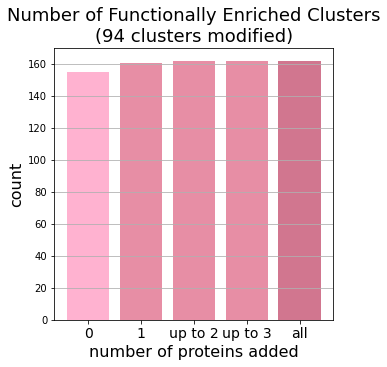

In [41]:
# create clusters graph
fig, ax = plt.subplots()

x_values = ["0", "1", "up to 2","up to 3", "all"]
counts = [original_fe.enrichment['Module'].nunique(), updated_fe_one_protein.enrichment['Module'].nunique(), updated_fe_two_proteins.enrichment['Module'].nunique(), updated_fe_three_proteins.enrichment['Module'].nunique(), updated_fe_all_proteins.enrichment['Module'].nunique()]
print(counts)


ax.bar(x_values, counts, color=['xkcd:powder pink', 'xkcd:pig pink', 'xkcd:pig pink', 'xkcd:pig pink', 'xkcd:muted pink'])

ax.set_xticklabels(x_values, fontsize=14)

ax.set_title(f"Number of Functionally Enriched Clusters\n({len(qualifying_proteins.keys())} clusters modified)", fontsize=18)
ax.set_ylabel('count', fontsize=16)

ax.set_xlabel('number of proteins added', fontsize=16)

ax.grid(axis='y')

fig.set_size_inches(5,5)
plt.show()


[405, 454, 475, 500, 663]


/var/folders/hk/q40rrztn3glcl0jvwjcpzyth0000gn/T/ipykernel_23965/3240710707.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, fontsize=14)


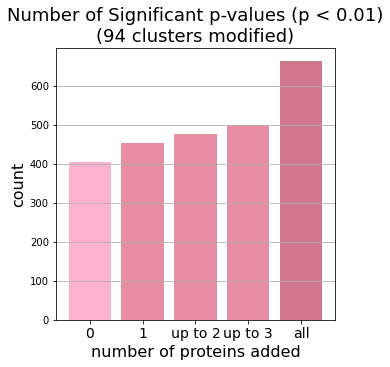

In [43]:
# create p-val graph
fig, ax = plt.subplots()

x_values = ["0", "1", "up to 2", "up to 3", "all"]
counts = [original_fe.enrichment['Fishers_pvalue'].count(), updated_fe_one_protein.enrichment['Fishers_pvalue'].count(), updated_fe_two_proteins.enrichment['Fishers_pvalue'].count(), updated_fe_three_proteins.enrichment['Fishers_pvalue'].count(), updated_fe_all_proteins.enrichment['Fishers_pvalue'].count()]
print(counts)


ax.bar(x_values, counts, color=['xkcd:powder pink', 'xkcd:pig pink', 'xkcd:pig pink', 'xkcd:pig pink', 'xkcd:muted pink'])

ax.set_xticklabels(x_values, fontsize=14)

ax.set_title(f"Number of Significant p-values (p < 0.01)\n({len(qualifying_proteins.keys())} clusters modified)", fontsize=18)
# TODO: do i want to say number of significant p-values, or do i want to say number of Go-Terms / labels etc

ax.set_ylabel('count', fontsize=16)
ax.set_xlabel('number of proteins added', fontsize=16)

ax.grid(axis='y')

fig.set_size_inches(5,5)
plt.show()



In [28]:
# TODO: now want to see which GO terms are functionally enriched

original_enriched_terms = original_fe.enrichment['Term']
enriched_terms_one_protein = updated_fe_one_protein.enrichment['Term']
enriched_terms_two_proteins = updated_fe_two_proteins.enrichment['Term']
enriched_terms_three_proteins = updated_fe_three_proteins.enrichment['Term']
enriched_terms_all_proteins = updated_fe_all_proteins.enrichment['Term']

In [47]:
original_terms_vs_1p = (set(original_enriched_terms) - set(enriched_terms_one_protein))
original_terms_vs_2p = (set(original_enriched_terms) - set(enriched_terms_two_proteins))
original_terms_vs_3p = (set(original_enriched_terms) - set(enriched_terms_three_proteins))
original_terms_vs_allp = (set(original_enriched_terms) - set(enriched_terms_all_proteins))

new_terms_1p = (set(enriched_terms_one_protein) - set(original_enriched_terms))
new_terms_2p = (set(enriched_terms_two_proteins) - set(original_enriched_terms))
new_terms_3p = (set(enriched_terms_three_proteins) - set(original_enriched_terms))
new_terms_allp = (set(enriched_terms_all_proteins) - set(original_enriched_terms))


# print(f"{original_terms_vs_1p}")
# print(f"{original_terms_vs_2p}")
# print(f"{original_terms_vs_3p}")
# print(f"{original_terms_vs_allp}")

# print(f"{new_terms_1p}")
# print(f"{new_terms_2p}")
# print(f"{new_terms_3p}")
# print(f"{new_terms_allp}")

In [48]:
# construct a go term vs definition dict
go_to_def_dict = dict()
with open("data/GO.terms.tsv", 'r') as go_term_to_def_file:
    for line in go_term_to_def_file:
        arr = line.split()
        string = ""
        for i in arr[2:]:
            string += i
            string += " "
        go_to_def_dict[arr[1]] = string



# for term in new_terms_allp:
#     print(go_to_def_dict.get(term))

In [76]:
# construct a go term vs label dict. 
go_to_label_dict = dict()


with open("../../data/go-results/dream_3_go_results.tsv", "r") as file:
    for line in file: 
        arr = line.split()
        go_to_label_dict[arr[0]] = arr[2]

print(len(go_to_label_dict.keys()))

1169


In [54]:
# count number of terms of each type
bp_counter_1p = 0
cc_counter_1p = 0
mf_counter_1p = 0
for term in new_terms_1p:
    if go_to_label_dict.get(term) == "biological_process":
        bp_counter_1p += 1
    elif go_to_label_dict.get(term) == "cellular_component":
        cc_counter_1p += 1
    elif go_to_label_dict.get(term) == "molecular_function":
        mf_counter_1p += 1


bp_counter_allp = 0
cc_counter_allp = 0
mf_counter_allp = 0
for term in new_terms_allp:
    if go_to_label_dict.get(term) == "biological_process":
        bp_counter_allp += 1
    elif go_to_label_dict.get(term) == "cellular_component":
        cc_counter_allp += 1
    elif go_to_label_dict.get(term) == "molecular_function":
        mf_counter_allp += 1


[10, 6, 92]


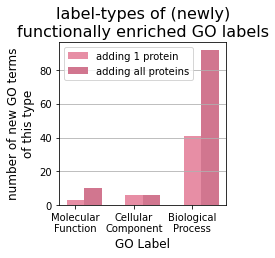

In [55]:
# create graph to compare coutns of each label type (one and all proteins)
fig, ax = plt.subplots()

x_values = ["Molecular\nFunction", "Cellular\nComponent", "Biological\nProcess"]
counts_1p = [mf_counter_1p, cc_counter_1p, bp_counter_1p]
counts_allp = [mf_counter_allp, cc_counter_allp, bp_counter_allp]
print(counts_allp)


width = .3
ax.bar(x_values, counts_1p, width=width, color='xkcd:pig pink')
ax.bar(np.arange(len(counts_allp))+ width, counts_allp, width=width, color='xkcd:muted pink')

# ax.set_xticklabels(x_values, fontsize=12)

ax.set_title(f"label-types of (newly)\nfunctionally enriched GO labels", fontsize=16)


ax.set_ylabel('number of new GO terms\nof this type', fontsize=12)
ax.set_xlabel('GO Label', fontsize=12)

ax.grid(axis='y')
ax.legend(["adding 1 protein", "adding all proteins"], loc=2)

fig.set_size_inches(3,3)
plt.show()


[8, 9, 64]


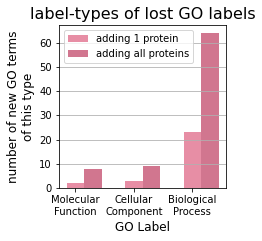

In [56]:
# create graph to compare coutns of each label type ythat was lost (one and all proteins)

original_terms_vs_1p
original_terms_vs_allp

# count number of terms of each type
bp_counter_1p = 0
cc_counter_1p = 0
mf_counter_1p = 0
for term in original_terms_vs_1p:
    if go_to_label_dict.get(term) == "biological_process":
        bp_counter_1p += 1
    elif go_to_label_dict.get(term) == "cellular_component":
        cc_counter_1p += 1
    elif go_to_label_dict.get(term) == "molecular_function":
        mf_counter_1p += 1


bp_counter_allp = 0
cc_counter_allp = 0
mf_counter_allp = 0
for term in original_terms_vs_allp:
    if go_to_label_dict.get(term) == "biological_process":
        bp_counter_allp += 1
    elif go_to_label_dict.get(term) == "cellular_component":
        cc_counter_allp += 1
    elif go_to_label_dict.get(term) == "molecular_function":
        mf_counter_allp += 1


# plot!
fig, ax = plt.subplots()

x_values = ["Molecular\nFunction", "Cellular\nComponent", "Biological\nProcess"]
counts_1p = [mf_counter_1p, cc_counter_1p, bp_counter_1p]
counts_allp = [mf_counter_allp, cc_counter_allp, bp_counter_allp]
print(counts_allp)

width = .3
ax.bar(x_values, counts_1p, width=width, color='xkcd:pig pink')
ax.bar(np.arange(len(counts_allp))+ width, counts_allp, width=width, color='xkcd:muted pink')


# ax.set_xticklabels(x_values, fontsize=12)

ax.set_title(f"label-types of lost GO labels", fontsize=16)


ax.set_ylabel('number of new GO terms\nof this type', fontsize=12)
ax.set_xlabel('GO Label', fontsize=12)

ax.grid(axis='y')
ax.legend(["adding 1 protein", "adding all proteins"], loc=2)

fig.set_size_inches(3,3)
plt.show()


In [50]:
# METHOD ___ STATS:
from statistics import median

# avg cluster size of modified cluster (compared to average cluster size)
running_sum = list()
for key in clusters.get_all_clusters():
    running_sum.append(len(clusters.get_cluster_proteins(key)))
print(f"the average cluster size is {sum(running_sum)/len(running_sum)}. median is {median(running_sum)}")

running_sum2 = list()
for key in qualifying_proteins.keys():
    running_sum2.append(len(clusters.get_cluster_proteins(key)))
print(f"the average modified cluster size (before modification) is {sum(running_sum2)/len(running_sum2)}. median is {median(running_sum2)}")



# find the number of proteins added
sum_all = list()
for key in qualifying_proteins.keys():
    sum_all.append(len(qualifying_proteins[key]))


sum_three = list()
for key in three_qualifying_proteins.keys():
    sum_three.append(len(three_qualifying_proteins[key]))

sum_two = list()
for key in two_qualifying_proteins.keys():
    sum_two.append(len(two_qualifying_proteins[key]))



from statistics import median

print(f"avg number of two proteins: {sum(sum_two) /len(sum_two)}, median: {median(sum_two)}\navg number of three proteins: {sum(sum_three) / len(sum_three)}, median: {median(sum_three)}\navg number of all proteins: {sum(sum_all) / len(sum_all)}, median: {median(sum_all)}")



the average cluster size is 23.542713567839197. median is 15
the average modified cluster size (before modification) is 37.244680851063826. median is 27.0
avg number of two proteins: 1.6808510638297873, median: 2.0
avg number of three proteins: 2.1914893617021276, median: 3.0
avg number of all proteins: 7.75531914893617, median: 3.0


In [37]:
# # TODO: go labels that are now functionally enriched (will need to do it on a cluster basis including the cluster name)
# print(f"there are {} go labels that are newly functionally enriched after adding 1 protein, {} after 2 proteins, {} after 3 proteins, and {} after all proteins")
# # go labels that are no longer functionally enriched
# print(f"after adding 1 protein, {len(original_terms_vs_1p)} labels are lost. after adding 2 proteins {len(original_terms_vs_2p)} are lost. {len(original_terms_vs_3p)} after 3, and {len(original_terms_vs_allp)} after all")


# print(f"{new_terms_1p}")
# print(f"{new_terms_2p}")
# print(f"{new_terms_3p}")
# print(f"{new_terms_allp}")


345
372


[345, 367, 373, 386, 372]


/var/folders/hk/q40rrztn3glcl0jvwjcpzyth0000gn/T/ipykernel_23965/2426469526.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values, fontsize=14)


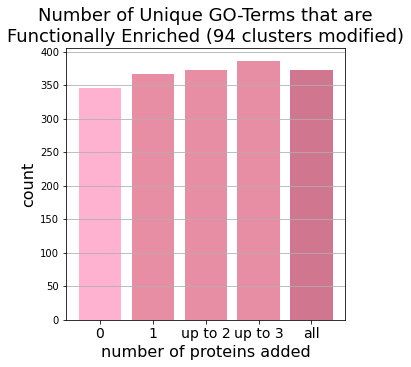

In [61]:
# create p-val graph
fig, ax = plt.subplots()

x_values = ["0", "1", "up to 2", "up to 3", "all"]
counts = [len(set(original_enriched_terms))
, len(set(enriched_terms_one_protein)), len(set(enriched_terms_two_proteins)), len(set(enriched_terms_three_proteins)), len(set(enriched_terms_all_proteins))]
print(counts)


ax.bar(x_values, counts, color=['xkcd:powder pink', 'xkcd:pig pink', 'xkcd:pig pink', 'xkcd:pig pink', 'xkcd:muted pink'])

ax.set_xticklabels(x_values, fontsize=14)

ax.set_title(f"Number of Unique GO-Terms that are\nFunctionally Enriched ({len(qualifying_proteins.keys())} clusters modified)", fontsize=18)
# TODO: do i want to say number of significant p-values, or do i want to say number of Go-Terms / labels etc

ax.set_ylabel('count', fontsize=16)
ax.set_xlabel('number of proteins added', fontsize=16)

ax.grid(axis='y')

fig.set_size_inches(5,5)
plt.show()

In [69]:
original_fe.enrichment[["Module", 'Term', 'Count_in_Module', 'Count_in_Background', 'Fishers_pvalue']]


,Module,Term,Count_in_Module,Count_in_Background,Fishers_pvalue
0,cluster_0,GO:0000724,3,43,0.004074
1,cluster_0,GO:0008157,2,17,0.00765
2,cluster_0,GO:0010165,2,17,0.00765
3,cluster_1,GO:0007416,2,24,0.001082
4,cluster_100,GO:0000086,2,86,0.005169
...,...,...,...,...,...
400,cluster_95,GO:0043666,2,21,0.006632
401,cluster_96,GO:0005179,5,47,0.001872
402,cluster_98,GO:0007156,3,25,0.006058
403,cluster_99,GO:0018105,4,143,0.006975


In [73]:
# determine number of nodes in multiple clusters

# total number of proteins added back
proteins_added = list()
for key in qualifying_proteins.keys():
    for protein in qualifying_proteins[key]:
        proteins_added.append(protein)

# print(f"{proteins_added}")


print(f"{len(set(proteins_added))}")



156


In [75]:
# determine number of nodes in all clusters

all_proteins_in_clusters = set()
for key in clusters.get_all_cluster_labels():
    all_proteins_in_clusters.update(clusters.get_cluster_proteins(key))

print(f"{len(set(all_proteins_in_clusters))}")



get_all_cluster_labels fxn has not been tested
4685


In [38]:
# TODO: also want to check out on a cluster vs cluster basis